# Smooth Cubic Multivariate Local Interpolations

* Cubic interpolation scheme in up to 4 dimensions
* Uses only local data, i.e. grid points touching a cell
* Uses values and all combinations of first-order derivatives, e.g. in 2D f_x, f_y, f_xy
* Based on Lekien & Marsden 2005
   * Only 3D
   * Coefficients calculated by Matrix inversion (slow)
* Improvements by Daniel Pfenniger:
   * Added 1D - 4D
   * Coefficient directly calculated (Maple-generated code)

## LocalInterpolations.jl

* Julia package

## loci

* Library written in C
* Static library for C/C++
* Shared library for Python and others (e.g. FORTRAN)

## Python usage

### import matplotlib, numpy, scipy and classes of loci

In [1]:
%matplotlib inline 
from matplotlib.pyplot import *
from numpy import *
from scipy import *

rcParams['figure.figsize'] = (10, 6)
rcParams.update({'font.size': 16})

#Plotting Colors
lin  = ["#000000", "#FF0000", "#0000FF", "#FFA500", "#008000", "#808080", 
        "#800080", "#008080"]

from loci import Interpolation, Range

### Define functions and derivative

In [2]:
A=2.
B=0.5
def f(x, y):    return log(A*x**2 + B*y**2 + 1)
def f_x(x, y):  return 2*A*x/(A*x**2 + B*y**2 + 1)
def f_y(x, y):  return 2*B*y/(A*x**2 + B*y**2 + 1)
def f_xy(x, y): return -4*A*B*x*y/(A*x**2 + B*y**2 + 1)**2

### Define interpolation ranges

In [3]:
rx  = Range(1., 0.1, 10)    #x0 =1., dx=0.1, lenght=
ry  = Range(-2., 0.5, 20)

rx = $1.0, 1.1, ..., 1.9$

#### Last element of `rx`
   `rx.x0 + (rx.len - 1)*rx.dx`

### Create interpolation

In [4]:
ip  = Interpolation(rx, ry, f, f_x, f_y, f_xy)

`ip` is defined on Range from `rx.x0` to `(rx.len - 2)*rx.dx`. Last gridpoint of rx out of bounds!

### Interpolate at a given point

In [5]:
xt  = rx.x0 + rand()*(rx.len - 2)*rx.dx
yt  = ry.x0 + rand()*(ry.len - 2)*ry.dx

d   = ip.interpolate(xt, yt)/f(xt, yt) - 1.

print "d = %e"%d

d = -1.334511e-07


### Interpolate derivatives in x and y

In [6]:
d_x = ip.diff_x(xt, yt)/f_x(xt, yt) - 1
d_y = ip.diff_y(xt, yt)/f_y(xt, yt) - 1

print "d_x = %e\nd_y = %e"%(d_x, d_y)

d_x = -3.348202e-06
d_y = -3.363360e-05


### Interpolate 2nd-order x and 3rd-order y derivative

In [7]:
print ip.diff(2, 3, xt, yt)

0.0344457302644


### Interpolate out of bounds

In [8]:
print ip.interpolate(rx.x0 - 1, ry.x0)
print ip.interpolate(rx.x0, ry.x0 + (ry.len-1)*ry.dx)

nan
nan


### Create points in range rx for mapping

In [9]:
xs  = r_[rx.x0:rx.x0+(rx.len - 1)*rx.dx:rx.dx/1000]
ys  = zeros(len(xs))

fs  = f(xs, ys)
ips = ip.map(xs, ys)

### Map interpolation and derivatives in x, y and 2nd-order x and 3rd-order y on points

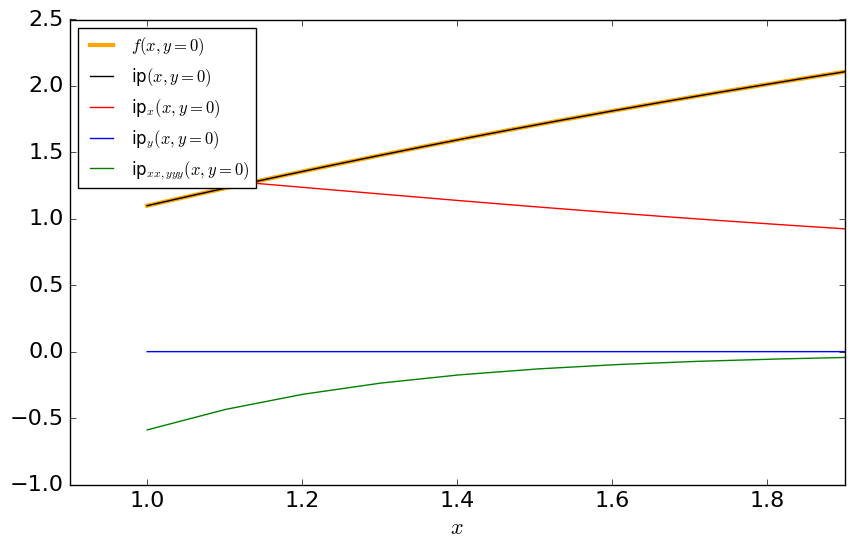

In [10]:
plot(xs, fs, "-", color=lin[3], linewidth=3, label="$f(x, y=0)$")
plot(xs, ips, "-", color=lin[0], label="ip$(x, y=0)$")
plot(xs, ip.map_x(xs, ys), "-", color=lin[1], label="ip$_x(x, y=0)$")
plot(xs, ip.map_y(xs, ys), "-", color=lin[2], label="ip$_y(x, y=0)$")
plot(xs, ip.map_diff(2, 3, xs, ys), "-", color=lin[4], label="ip$_{xx,yyy}(x, y=0)$")

legend(loc=0, fontsize=12)
xlabel("$x$")

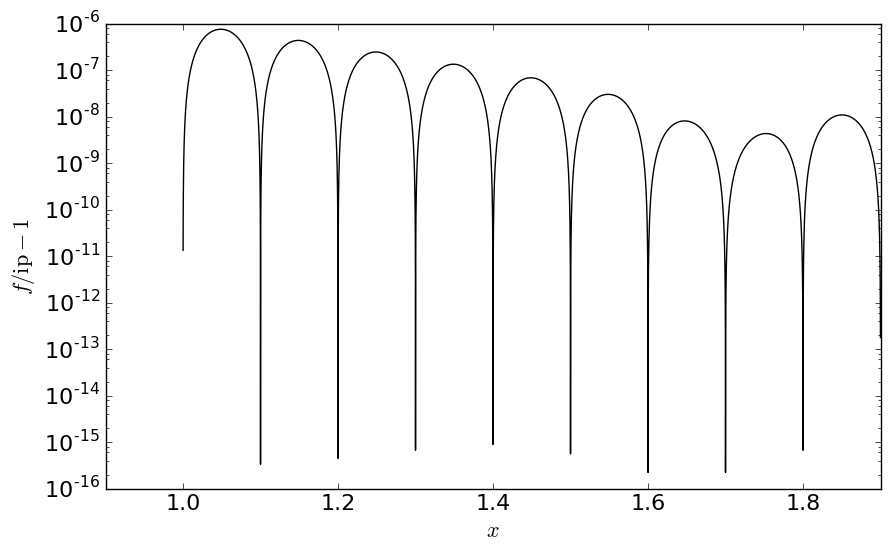

In [11]:
semilogy(xs, abs(fs/ips - 1), "-", color=lin[0])

xlabel("$x$")
ylabel("$f/\mathrm{ip}-1$")